<p></p>

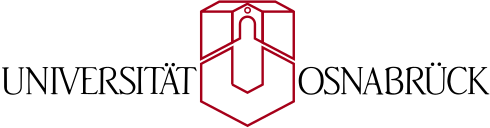
# <center>Einführung in die Künstliche Intelligenz</center> <a class="tocSkip">
### <center>Wintersemester 2020/21</center> <a class="tocSkip">
<center>Prof. Dr. Joachim Hertzberg, Felix Igelbrink, Alexander Mock</center>

# Disclaimer

Die hier enthaltenen Lösungen stellen nur Beispiele dar. Sie erheben keinerlei Anspruch auf Richtig- und Vollständigkeit und sind **nicht** zur Vorbereitung für die Klausur geeignet! 

Jegliche Vervielfältigung und Verbreitung über die Veranstaltung "Künstliche Intelligenz" im Wintersemester 2020/21 der Universität Osnabrück hinaus ist nicht gestattet.

# Übungsblatt 7: Modellierung von Unsicherheit

## Prädikatenlogische und CWA Folgerung

Gegeben seien folgende Sachverhalte:

- Alle Kanadier können Englisch sprechen.
- Alle Quebecer können Französisch sprechen.
- Alle Quebecer sind Kanadier.
- Es gibt einen Kanadier, der Französisch spricht.
- Robert ist ein Quebecer.
- Joe ist ein Kanadier.

### 

Formulieren Sie die Sachverhalte in Prädikatenlogik


- $\forall x.[kanadier(x) \Rightarrow spricht\_engl(x) ]$
- $\forall x.[quebecer(x) \Rightarrow spricht\_franz(x) ]$
- $\forall x.[quebecer(x) \Rightarrow kanadier(x)]$
- $\exists x.[kanadier(x) \land spricht\_franz(x)]$\
    ($\exists x.[kanadier(x) \Rightarrow spricht\_franz(x)]$: Ist auch wahr wenn die Aussage ist: Es gibt einen Nicht-Kanadier, der französisch spricht.)
- $quebecer(robert)$
- $kanadier(joe)$




### 

Welche Sprachen können jeweils Robert und Joe sprechen bzw. nicht sprechen? Beantworten Sie die Frage für die klassische prädikatenlogische Folgerung und für die CWA-Folgerung.


prädikatenlogische Folgerung:

- $spricht\_engl(robert)$
- $spricht\_franz(robert)$
- $spricht\_engl(joe)$

closed-world assumption (CWA): undefiniert $\rightarrow$ false.

- $\neg spricht\_franz(joe)$




## Circumscription

Gegeben ist Ihnen eine Menge an Fakten $W$ mit

\begin{align*}
  W & = \left\{freund\left(Tom, Bob \right),
  freund\left(Bob, Sally \right), freund\left(Sally, Tina \right)
  \right\}
\end{align*}

wobei Konstanten mit einem Großbuchstaben beginnen.

### 

Drücken Sie die folgende Aussage mittels Circumscription aus:

"Normalerweise ist der Freund meines Freundes auch mein Freund."


Abnormalitätsprädikat: $ab_{freund}(x,y)$

$[freund(x,y) \land freund(y,z) \land \neg ab_{freund}(x,z) ] \Rightarrow freund(x,z)$




### 

Welche Fakten folgen aus $W$ mit Hilfe der Regel aus 2.1?


- $freund(Tom, Selly)$, wenn $\neg ab_{freund}(Tom, Selly)$
- $freund(Bob, Tina)$, wenn $\neg ab_{freund}(Bob, Tina)$




## Default-Schließen

Der ehemalige republikanische US-Präsident Nixon (der, der den Vietnamkrieg aufgehört hat und am Watergate-Skandal gescheitert ist) war von seiner religiösen Überzeugung Quäker. Das ist eine interessante Kombination, die zu einem der Standard-Beispiele in der KI zum Default-Schließen geführt hat. Das geht folgendermaßen:
- Normalerweise sind Quäker pazifistisch eingestellt
- Normalerweise sind Republikaner nicht pazifistisch eingestellt
- Nixon ist Quäker und Republikaner
- Frage: Ist Nixon nun pazifistisch oder nicht pazifistisch eingestellt?

Benutzen Sie die Prädikate $P(.)$ für „ist Pazifist“, $Q(.)$ für „ist Quäker“, $R(.)$ für „ist Republikaner“ in einer Prädikatenlogik-Formalisierung der genannten Sachverhalte. 


**Prädikatenlogik**

- $\forall x. Q(x) \Rightarrow P(x)$
- $\forall x. R(x) \Rightarrow \neg P(x)$
- $Q(nixon) \land R(nixon)$

**KNF**
- $\neg Q(x) \lor P(x)$
- $\neg R(x) \lor \neg P(x)$
- $Q(nixon) \land R(nixon)$

1. $\{\neg Q(x), P(x)\}$
2. $\{\neg R(x), \neg P(x) \}$
3. $\{Q(nixon)\}$
4. $\{R(nixon)\}$

**Resolution: Inkonsistenz check**

5. $Res(1, 2) : \{x \mapsto x\} = \{\neg Q(x), \neg R(x)\}$
6. $Res(5, 3): \{x \mapsto nixon \} = \{\neg R(nixon)\}$
7. $Res(6, 4): \{\} = \{\}$

$\square$

Wissensbasis ist inkonsistent.


Man kann also keine Aussage darüber treffen, ob Nixon pazifistisch oder nicht pazifistisch eingestellt ist.




### Modellierung in Prolog
Modellieren Sie den selben Sachverhalt in Prolog. Sie werden dabei schnell auf das Problem stoßen, dass Sie zur Modellierung von „nicht pazifistisch“ eine echte Negation brauchen. Das bekommen Sie in Prolog-Hornklauseln nicht formuliert. Nehmen Sie zur Lösung stattdessen zwei Prädikate, die auch umgangssprachlich gern dafür verwendet werden: Pazifisten sind „Tauben“ (Prädikat $T(.)$) und Nicht-Pazifisten sind „Falken“ ($F(.)$). Modellieren Sie damit das Nixon-Beispiel in Prolog und stellen Sie fest, ob Nixon eine Taube oder ein Falke ist! Beachten Sie, dass es nicht geht dass jemand sowohl Falke als auch Taube ist! Was beobachten Sie und warum?

In [ ]:
from isolated_prolog import IsolatedProlog
prolog = IsolatedProlog()


pc = """
q(nixon).
r(nixon).

t(X):-
    r(X), not(f(X)).
    
f(X):-
    q(X), not(t(X)).
"""

prolog.consult(pc, file=False)
print(list(prolog.query("f(X)", maxresult=1))[0])



### Modellierung mit Circumscription
Um das Default-Schließen in Circumscription zu formulieren, brauchen Sie zusätzlich zwei Abnormalitäts-Prädikate – welche? Was sind minimale Folgerungen bezüglich Nixons Pazifisten-Eigenschaft, wenn Sie Circumscription mit Minimierung bezüglich der Abnormalitäts-Prädikate anwenden? Entsprechend der Circumscription-Ergebnisse: Ist Nixon nun Pazifist oder nicht?


\begin{align}
 &\forall x.\left[Q(x)\land \neg ab_Q(x) => P(x)\right] \\
 &\forall x.\left[R(x)\land \neg ab_R(x) => \neg P(x)\right]\\
 &R(Nixon)\\
 &Q(Nixon)
\end{align}

Es gibt zwei normalste Modelle der Wissensbasis:
- Eines mit $ab_Q(Nixon)$ (und keinen weiteren $ab_Q$- oder $ab_R$-Objekten): in dem gilt $\neg P(Nixon)$
- Eines mit $ab_R(Nixon)$ (und keinen weiteren $ab_Q$- oder $ab_R$-Objekten): in dem gilt $P(Nixon)$

Man weiß nicht, ob Nixon Pazifist ist/war. Es gibt begründete Schlussfolgerungen pro und contra.



## Bedingte Wahrscheinlichkeit

In der Vorlesung haben Sie bedingte Wahrscheinlichkeiten und Unabhängigkeiten kennengelernt: Zwei Zufallsvariablen $A,B$ sind *bedingt unabhängig* von $C$ falls

\begin{align}
  P(A,B\ |\ C) & = P(A\ |\ C) P(B\ |\ C)
  \label{eq:cond_prob_ind}
\end{align}

gilt.


### 

Beweisen Sie die Behauptung auf der gleichen Folie, nämlich, dass die Formulierung

\begin{align}
  P(A\ |\ B,C) = P(A\ |\ C)
\end{align}

zur obigen Gleichung äquivalent ist. Daraus folgt dann auch $P(B\ |\ A,C) = P(B\ |\ C)$, da es sich nur um Umbenennung der Bezeichner handelt.



\begin{align*}
    P(A, B\ |\ C) & = P(A\ |\ C) P(B\ |\ C) \\
    \Leftrightarrow \frac{ P(A \cap B \cap C )}{ P(C) }  & = \frac{P(A \cap C)}{P(C)} \frac{P(B \cap C)}{P(C)}\\
    \Leftrightarrow \frac{P(A \cap B \cap C )}{ P( B \cap C)} & = \frac{P(A \cap C)}{P(C)}\\
    \Leftrightarrow P(A\ |\ B,C) & = P(A\ |\ C)
\end{align*}



### 

Was bedeutet $P(A | C, B) = P(A | B)$ bezüglich $A$ und $C$?


A ist bedingt unabhängig von C.



## Wahrscheinlichkeitsverteilungen

Seien $A,B,C$ Zufallsvariablen. $A$ und $B$ können zwei mögliche
Werte annehmen, `wahr/w` und `falsch/f`. $C$ besitzt drei
Werte `hoch`, `mittel` und `niedrig`. Die gemeinsame
Wahrscheinlichkeitsverteilung ist durch folgende Tabelle definiert:


| C | (A=w,B=w) | (A=f,B=w) | (A=w, B=f) | (A=f,B=f) |
|:-----:|:-----:|:-----:|:-------:|:---------:|
| hoch | $0.07$ | $0.08$ | $0.03$ | $0.05$ |
| mittel | $0.12$ | $0.12$ | $0.01$ | $0.17$ |
| niedrig | $0.05$ | $0.05$ | $0.15$ | $0.1$ |

Berechnen Sie die folgenden Wahrscheinlichkeitsverteilungen:

1. $\mathbf{P} \left(A, B \right)$
2. $\mathbf{P} \left(A,C \right)$
3. $\mathbf{P} \left(B \right)$
4. $\mathbf{P} \left(A,B|C = \text{mittel} \right)$
5. $\mathbf{P} \left(A|B = \text{wahr}, C = \text{hoch} \right)$


1. $\mathbf{P} \left(A, B \right)$

\begin{align*}
        P(A,B) &= \langle P(w,w), P(f,w), P(w,f), P(f,f) \rangle \\
               &= \langle 0.24 ; 0.25; 0.19; 0.32 \rangle  
\end{align*}


2. $\mathbf{P} \left(A,C \right)$.

\begin{align*}
   P(A,C) &= \langle P(w,h), P(w,m), P(w,n), P(f,h), P(f,m), P(f,n)  \rangle \\
               &= \langle 0.1 ; 0.13; 0.2; 0.13; 0.29; 0.15 \rangle  
\end{align*}

3. $\mathbf{P} \left(B \right)$.

    \begin{align*}
        P(B) &= \langle P(w), P(f) \rangle \\
               &= \langle 0.49 ; 0.51 \rangle  
    \end{align*}

  
4. $\mathbf{P} \left(A,B|C = \text{mittel} \right)$.

    \begin{align*}
        P(A,B | C = m) &= \langle P(w,w|m), P(w,f|m), P(f,w|m), P(f,f|m) \rangle \\
               &\approx \langle 0.29 ; 0.02; 0.29; 0.41 \rangle  
    \end{align*}
  
  
5. $\mathbf{P} \left(A|B = \text{wahr}, C = \text{hoch} \right)$.

    \begin{align*}
        P(A | B = w , C = h) &= \langle P(w|w,h), P(f|w,h) \rangle \\
               &\approx \langle 0.47; 0.53 \rangle  
    \end{align*}

